## Website Traffic Analysis

### Objective:
The analysis aims to provide insights into website usage patterns, user behavior, and content performance.

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\laksh\\Downloads\\traffic.csv") # reading the file

In [3]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,21-08-2021,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,21-08-2021,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,21-08-2021,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,21-08-2021,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,21-08-2021,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [4]:
df.shape

(226278, 9)

Dataset contains 226278 rows and 9 columns.

In [5]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [7]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y') # change the dtype of date to datetime

In [8]:
df.describe(include = 'all')

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,NaN,211,11993,2419,3253,3562,709,3839
top,pageview,NaN,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,NaN,47334,22791,40841,40841,40841,40841,40841
mean,NaN,2021-08-21 21:04:31.768355584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2021-08-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2021-08-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2021-08-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2021-08-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2021-08-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(df.duplicated().sum())
df=df.drop_duplicates()
df.duplicated().sum()

103711


0

In [10]:
df.isnull().sum()

event         0
date          0
country       5
city          5
artist       28
album         4
track         4
isrc       6306
linkid        0
dtype: int64

In [11]:
df = df.dropna(subset=['isrc'])

In [12]:
categorical_cols_to_fill = ['country', 'artist', 'album', 'track']
for col in categorical_cols_to_fill:
    df[col] = df[col].fillna('Other')
categorical_cols_to_fill = ['city']
for col in categorical_cols_to_fill:
    df[col] = df[col].fillna('Unknown')

In [13]:
df.isnull().sum()

event      0
date       0
country    0
city       0
artist     0
album      0
track      0
isrc       0
linkid     0
dtype: int64

In [14]:
df.duplicated().sum()

0

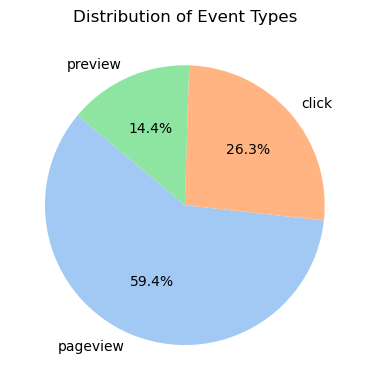

In [15]:
plt.figure(figsize=(4, 4))
event_counts = df['event'].value_counts()
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Event Types')
plt.tight_layout()
plt.show()

Most users (59.4%) are primarily viewing pages, indicating they are seeing the content but not actively interacting with it. A decent portion of users (26.3%) are clicking, which suggests they are interested enough to explore further. However, a smaller group (14.4%) is utilizing the preview feature. In essence, while a majority of users are looking at the content, less than half are actively engaging with it through clicks or previews.

In [16]:
df['day_of_week'] = df['date'].dt.day_name() # Create 'day_of_week' column
df['date_day'] = df['date'].dt.strftime('%d-%m-%Y') + '(' + df['day_of_week'].str[:3] + ')'

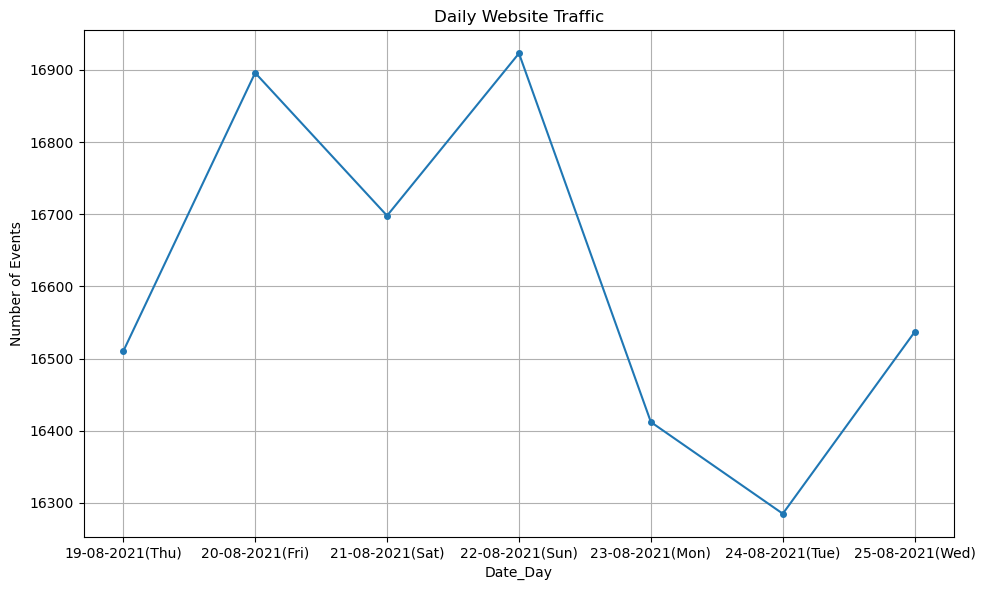

In [17]:
plt.figure(figsize=(10, 6))
daily_traffic = df.groupby('date_day').size()
plt.plot(daily_traffic.index, daily_traffic.values, marker='o', linestyle='-', markersize=4)
plt.title('Daily Website Traffic')
plt.xlabel('Date_Day')
plt.ylabel('Number of Events')
plt.grid(True)
plt.tight_layout()
plt.show()

Daily website traffic is fairly consistent throughout the week, with a slight peak on the weekend (Saturday and Sunday) and a small dip on Tuesday. Overall, there aren't huge fluctuations in daily traffic.

C:\Users\laksh\AppData\Local\Temp\ipykernel_18524\1044615572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_traffic.index, y=city_traffic.values, palette='viridis')


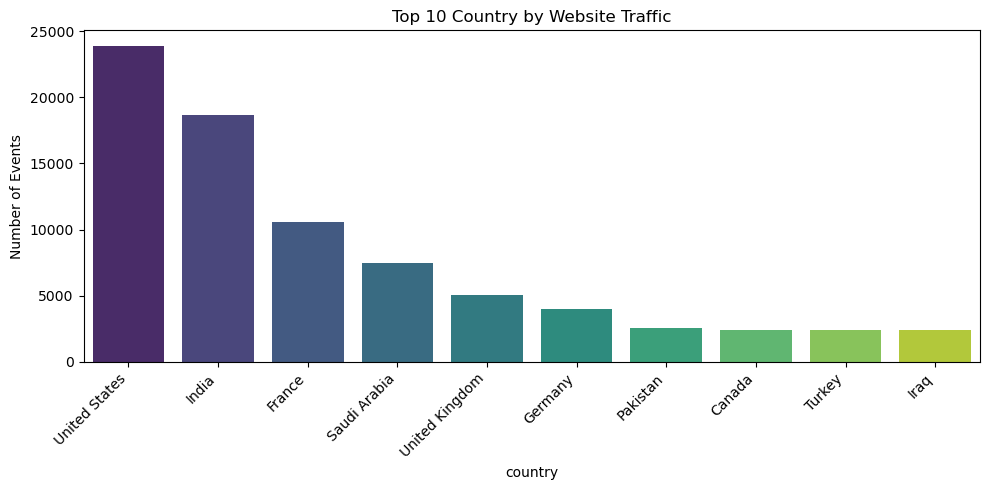

In [18]:
plt.figure(figsize=(10, 5))
city_traffic = df['country'].value_counts().head(10)  # Top 10 cities
sns.barplot(x=city_traffic.index, y=city_traffic.values, palette='viridis')
plt.title('Top 10 Country by Website Traffic')
plt.xlabel('country')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The website traffic is heavily concentrated in the United States and India, with significantly more visitors from those countries compared to the rest. After that, there's a drop, with France, Saudi Arabia, and the UK showing moderate traffic. The remaining countries in the top 10 contribute a smaller share of the overall traffic.

C:\Users\laksh\AppData\Local\Temp\ipykernel_18524\1384265769.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_traffic.index, y=city_traffic.values, palette='viridis')


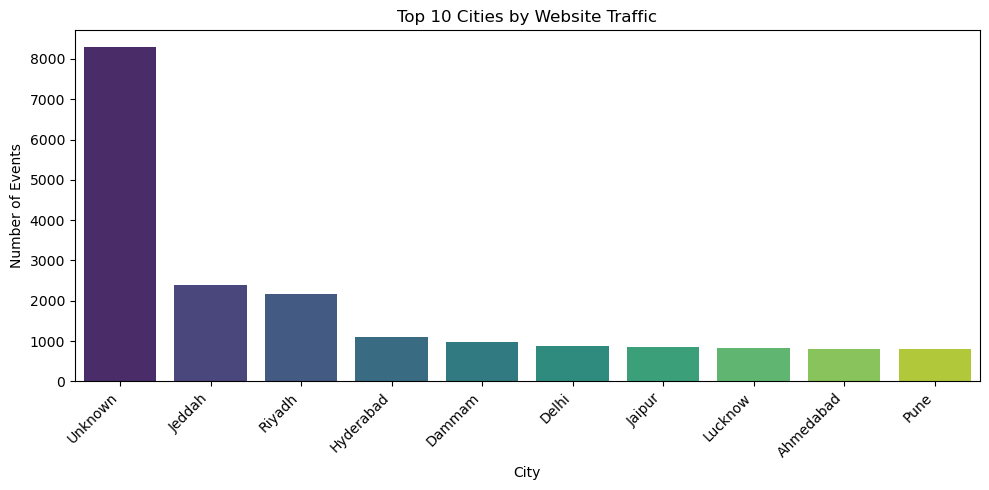

In [19]:
plt.figure(figsize=(10, 5))
city_traffic = df['city'].value_counts().head(10)  # Top 10 cities
sns.barplot(x=city_traffic.index, y=city_traffic.values, palette='viridis')
plt.title('Top 10 Cities by Website Traffic')
plt.xlabel('City')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A large portion of the city traffic is of unknown origin. Among the known cities, Jeddah and Riyadh in Saudi Arabia have the highest traffic, with a significant drop after that. Indian cities like Hyderabad, Delhi, Jaipur, Lucknow, Ahmedabad and Pune also appear in the top 10.

In [20]:
def split_artists(row):
    artists = row['artist'].split(',')
    artists = [artist.strip() for artist in artists]  # Remove extra spaces
    return pd.Series({'artist': artists})

# Split the 'artist' column and explode the list into separate rows
df_expanded = df.apply(split_artists, axis=1).explode('artist').reset_index(drop=True)
df_expanded = df.merge(df_expanded, left_index=True, right_index=True) # Merge the original df with the expanded one

# Print the expanded DataFrame
print(df_expanded)

# Example of using value_counts() after splitting
artist_counts = df_expanded['artist_y'].value_counts()
print("\nArtist Counts After Splitting:")
print(artist_counts)

           event       date         country          city  \
0          click 2021-08-21    Saudi Arabia        Jeddah   
2          click 2021-08-21           India      Ludhiana   
3          click 2021-08-21          France       Unknown   
4          click 2021-08-21        Maldives          Malé   
5          click 2021-08-21   United States   Los Angeles   
...          ...        ...             ...           ...   
173798  pageview 2021-08-22   United States       Oakwood   
173799  pageview 2021-08-22            Iraq  Sulaymaniyah   
173801  pageview 2021-08-22   United States    Wilmington   
173802  pageview 2021-08-22   United States    Mt. Morris   
173803  pageview 2021-08-21  United Kingdom    Manchester   

                                                 artist_x  \
0                                                  Tesher   
2                                           Reyanna Maria   
3                       Simone & Simaria, Sebastian Yatra   
4                      

C:\Users\laksh\AppData\Local\Temp\ipykernel_18524\3245177326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_traffic.index, y=artist_traffic.values, palette='magma')


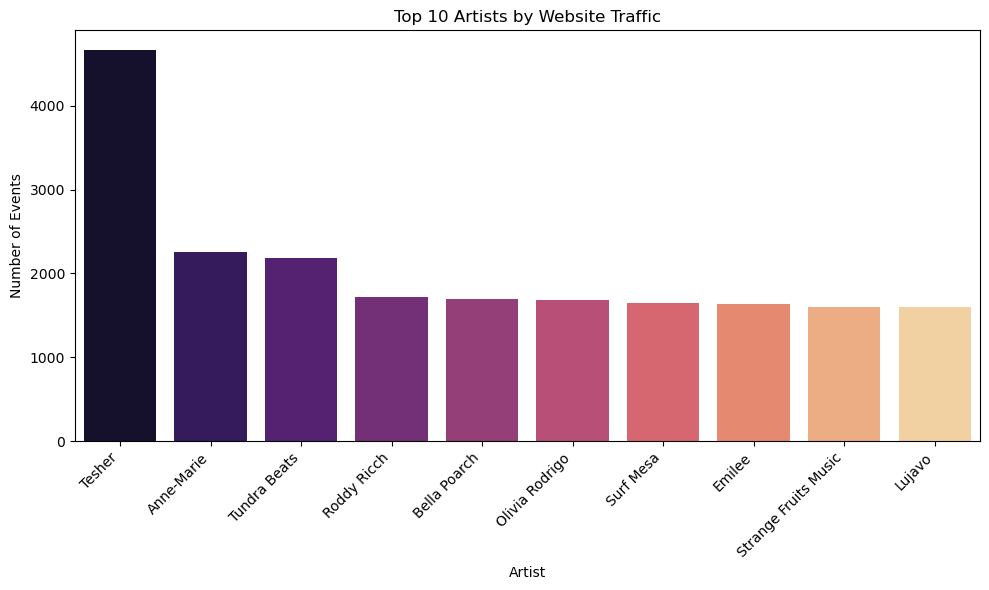

In [21]:
plt.figure(figsize=(10, 6))
artist_traffic = df_expanded['artist_y'].value_counts().head(10) # Top 10 artists
sns.barplot(x=artist_traffic.index, y=artist_traffic.values, palette='magma')
plt.title('Top 10 Artists by Website Traffic')
plt.xlabel('Artist')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The artist with the highest traffic is Tesher, with a noticeable lead. After that, there's a group of artists with fairly similar traffic, including Anne-Marie, Tundra Beats, Roddy Ricch, Bella Poarch and Olivia Rodrigo.

C:\Users\laksh\AppData\Local\Temp\ipykernel_18524\2436981185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=album_traffic.index, y=album_traffic.values, palette='coolwarm')


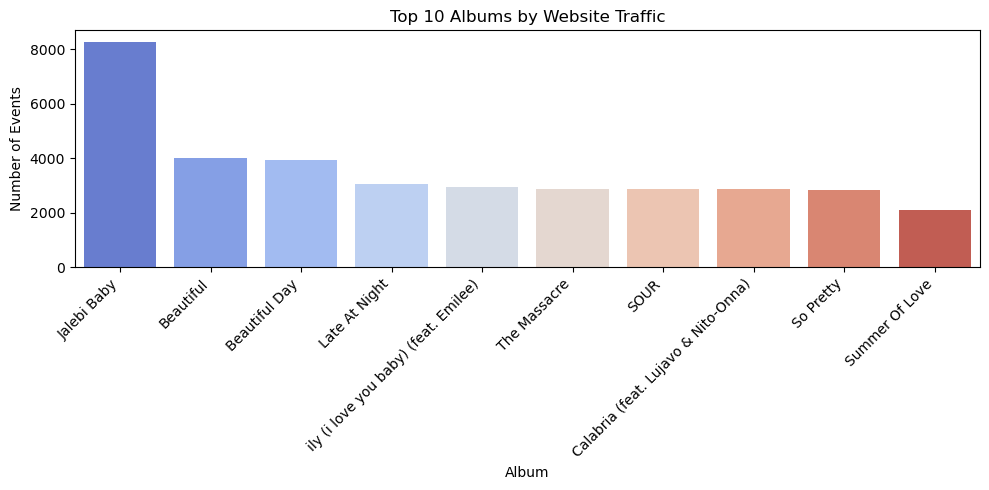

In [22]:
plt.figure(figsize=(10, 5))
album_traffic = df['album'].value_counts().head(10)
sns.barplot(x=album_traffic.index, y=album_traffic.values, palette='coolwarm')
plt.title('Top 10 Albums by Website Traffic')
plt.xlabel('Album')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

"Jalebi Baby" has significantly more traffic than any other album. After that, there are a few albums with a similar amount of traffic, and then traffic decreases as you go down the list.

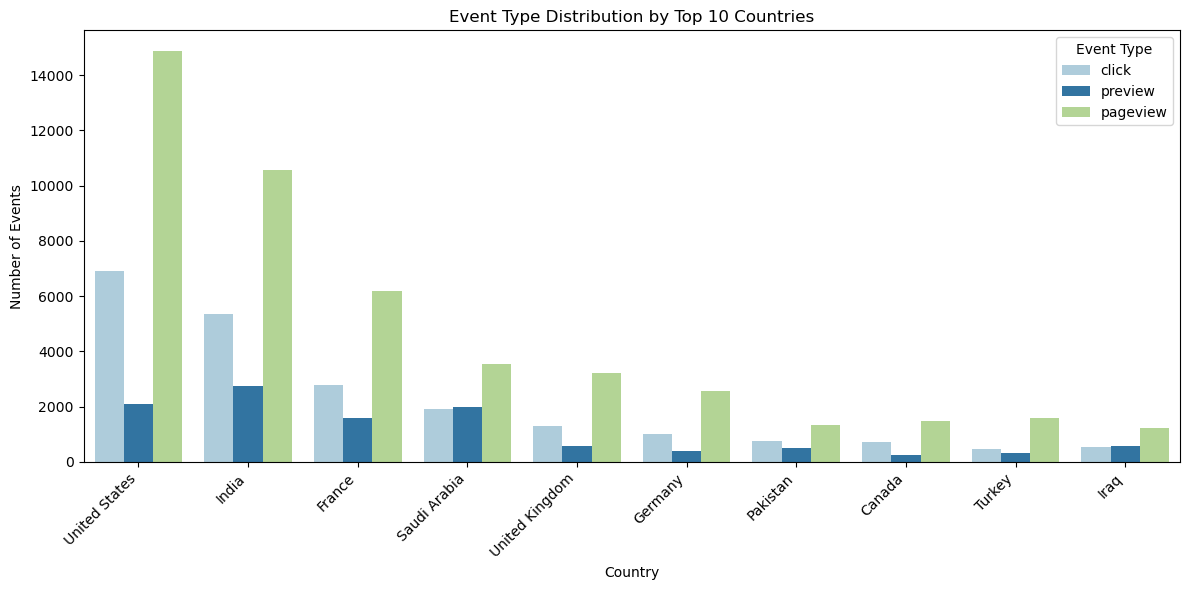

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='country', hue='event', data=df, palette='Paired', order=df['country'].value_counts().iloc[:10].index)
plt.title('Event Type Distribution by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

The United States and India show the highest engagement, with a large number of page views and clicks. This indicates strong interest and activity from these regions.  The other countries in the top 10 have lower overall engagement, with a noticeable drop-off after India. Page views are the most common event type across all countries, but the ratio of clicks and previews to page views varies. For example, Saudi Arabia shows a higher proportion of previews compared to other countries.

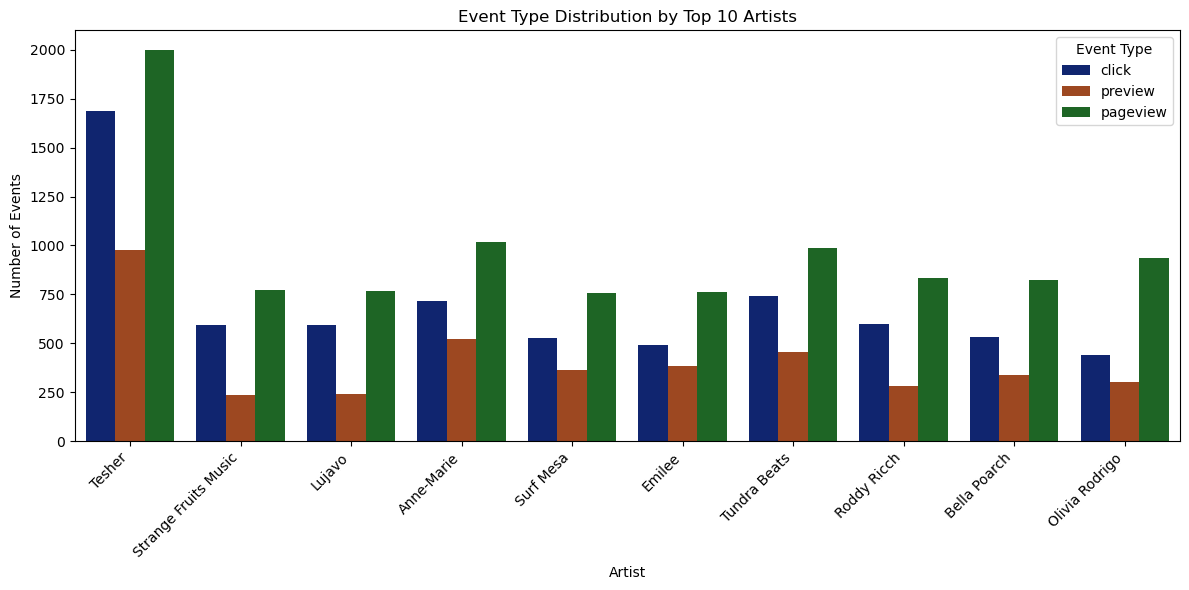

In [28]:
plt.figure(figsize=(12, 6))
top_artists = df_expanded['artist_y'].value_counts().head(10).index
sns.countplot(x='artist_y', hue='event', data=df_expanded[df_expanded['artist_y'].isin(top_artists)], palette='dark')
plt.title('Event Type Distribution by Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

Tesher has the highest overall engagement, with the most page views, clicks, and previews.  For the other artists, page views are generally the most frequent event type. 

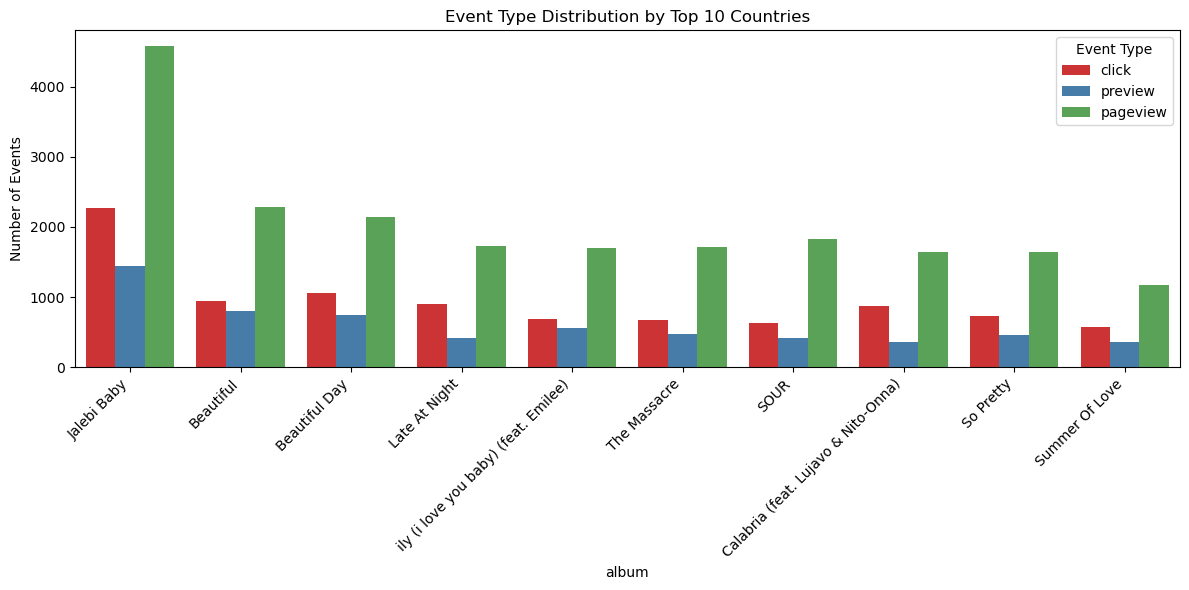

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='album', hue='event', data=df, palette='Set1', order=df['album'].value_counts().iloc[:10].index)
plt.title('Event Type Distribution by Top 10 Countries')
plt.xlabel('album')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

"Jalebi Baby" has significantly higher traffic across all event types (page views, clicks, and previews) compared to the other albums.  For the remaining albums, page views are consistently the highest event type, followed by clicks, and then previews.  The traffic volume decreases as you move down the list from "Beautiful" to "Summer Of Love."

## Conclusion